## 作業

礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!

最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練 CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以參考[連結](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)。

## 進階挑戰

有志以成為機器學習工程師為目標的同學們可以參加這個挑戰，這[網站](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)記錄了歷年來 Cifar-10 中排名最高的論文，請試著閱讀論文並撰寫出相對應的程式碼，復現出論文的結果。

這樣的能力在機器學習領域中是非常重要的，具備閱讀他人論文並實現的能力，可為自己在履歷上增添不少分數，當然難度也相當高，若是不透徹了解文章內容或是程式能力不夠紮實，可是不能復現別人辛苦的研究成果的喔！就請各位同學好好努力，往自己的機器學習之路邁進吧:)

In [1]:
import tensorflow as tf
from tensorflow.keras import utils, backend
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from utility.resnet import resnet

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.1.0


# 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x / 255.
    y = utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 10)


## 定義函數

In [6]:
class Trainer:

    def __init__(self, X_train, y_train, X_test, y_test, epochs=30, batch_size=64, learning_rate=1e-3):
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self._model = None
        self._history = None

    @property
    def optimizer(self):
        return Adam(lr=self.learning_rate)

    @property
    def validation_data(self):
        return (self.X_test, self.y_test,)

    def run(self):
        return self._clear()._build()._launch()

    def _clear(self):
        backend.clear_session()
        self._model = None
        return self

    def _build(self):
        model = self._model = resnet(input_shape=self.X_train.shape[1:])
        model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return self

    def _launch(self):
        print('Experiment with ResNet.')
        self._model.summary()
        self._history = self._model.fit(
            self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size,
            validation_data=self.validation_data, shuffle=True, verbose=2)
        return self

    def display(self, train_name, val_name):
        plt.figure(figsize=(8, 6,))
        plt.plot(self._history.history[train_name])
        plt.plot(self._history.history[val_name])
        plt.xlabel('Epoch')
        plt.ylabel(train_name)
        plt.title('Train History')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

## 訓練模型

In [7]:
trainer = Trainer(X_train, y_train, X_test, y_test).run()

Experiment with ResNet.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
______________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 26s - loss: 1.8650 - accuracy: 0.4966 - val_loss: 1.7149 - val_accuracy: 0.5351
Epoch 2/30
50000/50000 - 20s - loss: 1.3489 - accuracy: 0.6513 - val_loss: 1.6337 - val_accuracy: 0.5522
Epoch 3/30
50000/50000 - 20s - loss: 1.1247 - accuracy: 0.7176 - val_loss: 1.7812 - val_accuracy: 0.5271
Epoch 4/30
50000/50000 - 20s - loss: 0.9851 - accuracy: 0.7628 - val_loss: 1.0970 - val_accuracy: 0.7305
Epoch 5/30
50000/50000 - 20s - loss: 0.8904 - accuracy: 0.7961 - val_loss: 1.2935 - val_accuracy: 0.6391
Epoch 6/30
50000/50000 - 20s - loss: 0.8213 - accuracy: 0.8184 - val_loss: 1.3313 - val_accuracy: 0.6642
Epoch 7/30
50000/50000 - 20s - loss: 0.7640 - accuracy: 0.8369 - val_loss: 1.1422 - val_accuracy: 0.7321
Epoch 8/30
50000/50000 - 20s - loss: 0.7188 - accuracy: 0.8536 - val_loss: 1.2711 - val_accuracy: 0.7073
Epoch 9/30
50000/50000 - 20s - loss: 0.6831 - accuracy: 0.8657 - val_loss: 1.4403 - val_accuracy: 0.6629
Epoch

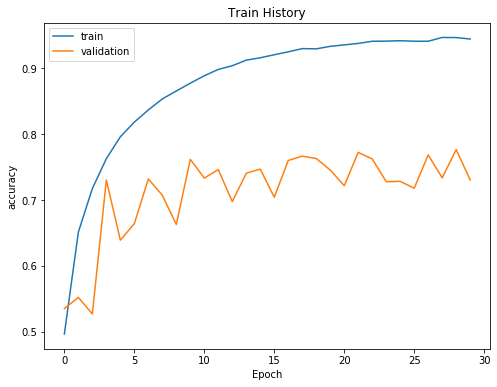

In [8]:
trainer.display('accuracy', 'val_accuracy')

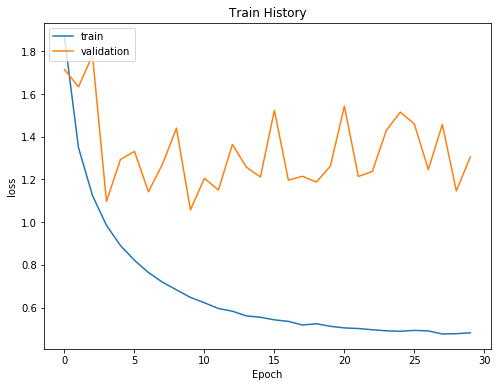

In [9]:
trainer.display('loss', 'val_loss')